# Introduction to Image Analysis with <font color='DarkBlue'>Python.</font>

## <font color='brown'>Reading images</font>

Exercise: Explore how to open simple tiff images using the PIL library.

Populating the interactive namespace from numpy and matplotlib


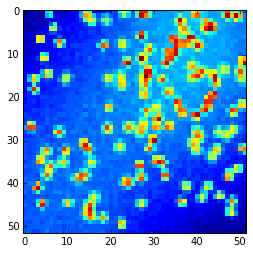

In [118]:
#This line is very important: (It turns on the inline visuals)!
%pylab inline
#This library is one of the libraries one can use for importing tiff files.
#For detailed info:http://effbot.org/imagingbook/image.htm
from PIL import Image

#We import our cell_fluorescent.tif image
im = Image.open('cell_fluorescent.tif')


#This line converts our image object into a numpy array (matrix).
im_array = np.array(im)

#This is an inline visual. It displays it after your code.
imshow(im_array)
#Notice the scale on the side of the image. What happens when you index a range.
#imshow(im_array[50:100,:])
#Or what happens when you index every fifth pixel:
#imshow(im_array[::5,::5],interpolation='nearest')
#Notice interpolation. What do you thing this is doing?


In [29]:
#Repeat the above step but for the image cell_colony.tif.
#Experiment with changing the look-up-table:
#imshow(im_array, cmap="Reds")
#more colors at: http://matplotlib.org/examples/color/colormaps_reference.html

## <font color='brown'>Reading a multi-page tiff</font>

Exercise: Explore how to access different slices and find the dimensions.

('image dimensions', (27, 226, 186))
('image dimensions', (226, 186))


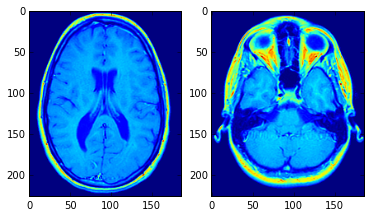

In [141]:
#Make sure you have previously run %pylab inline at least once.
#This library is another one of the libaries we can use to import tiff files
#It also works with formats such as .lsm which are tiff's in disguise.
from tifffile import imread as imreadtiff

#We import our mri-stack.tif image file.
im = imread('mri-stack.tif')
print('image dimensions',im.shape)

#This line converts our image object into a numpy array and then accesses the fifteenth slice.
im_slice = im[15,:,:]

#This activates a subplot which can be used to display more than one image in a grid.
subplot(1,2,1)
imshow(im_slice)

#We can also assess the raw data directly. 
im = imreadtiff('mri-stack.tif',key=5)
print('image dimensions',im.shape)

#This line converts our image object into a numpy array (matrix).
im_slice = im

#This is an inline visual. It displays it after your code.
subplot(1,2,2)
imshow(im_slice)


#Rerun the code and try and access different slices.
#How do you think you could extract the number of slices in this file?

## <font color='brown'>Reading a multi-page tiff with multiple channels</font>

Exercise: Explore the multiple colour channels and how to visualise them.

('image dimensions', (57, 256, 256, 3))


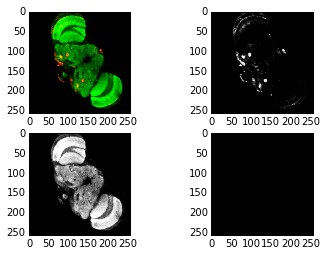

In [142]:
#Make sure you have previously run %pylab inline at least once.
#from tifffile import imread as imreadtiff

#We import our flybrain.tif image file.
im = imreadtiff('flybrain.tif')
print('image dimensions',im.shape)

#This line converts our image object into a numpy array and then accesses the fifteenth slice.
im_slice = im[15,:,:]

#This activates a subplot which can be used to display more than one image in a grid.
subplot(2,2,1)
#Notice imshow can also show three channel images
#By default (RGB) if there are three channels.
#Note this doesn't work if there are two channels or more than three.
imshow(im_slice)
subplot(2,2,2)
#Plot the individual channels by specifying their index. 
#Red channel.
imshow(im_slice[:,:,0],cmap="Greys_r")
subplot(2,2,3)
#Blue channel.
imshow(im_slice[:,:,1],cmap="Greys_r")
subplot(2,2,4)
#Green channel.
imshow(im_slice[:,:,2],cmap="Greys_r")

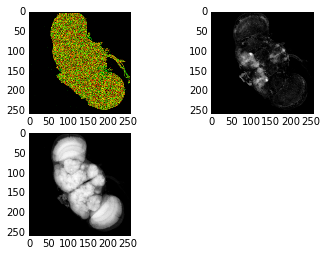

In [109]:
#Maximum projection.
#Take a look at this:
subplot(2,2,1)
imshow(np.average(im,0)[:,:,:])
subplot(2,2,2)
imshow(np.average(im,0)[:,:,0],cmap="Greys_r")
subplot(2,2,3)
imshow(np.average(im,0)[:,:,1],cmap="Greys_r")
#Can you work out what has happened.
#What happens when you use np.average instead?
#Can you work out why the average RGB image is so bad?

## <font color='brown'>Applying a threshold to an image.</font>

Exercise: Apply a threshold to an image.

('image min: ', 0, 'image max: ', 202, 'thr: ', 100)


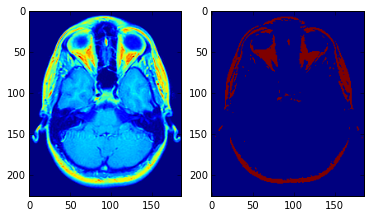

In [172]:
#Make sure you have previously run %pylab inline at least once.
#from tifffile import imread as imreadtiff
im_stack = imreadtiff('mri-stack.tif')
im_slice = im_stack[5,:,:]
thr = 100;

print('image min: ',np.min(im_slice),'image max: ',np.max(im_slice), 'thr: ',thr)
#Here we can very easily apply a threshold to the image.
binary = im_slice>thr
#Now we show the binary mask.
subplot(1,2,1)
imshow(im_slice)
subplot(1,2,2)
imshow(binary)

#What happens when you change the direction of the sign from '>' to '<'.
#Hopefully the result makes sense.



Dominic Waithe 2015 (c)